In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Task 1 : Derive the Velocity Profile 𝑢(𝑦)

In [2]:
y, h, U0, mu=sp.symbols('y h U0 mu')
u=sp.Function('u')(y)

f = sp.Eq(u.diff(y,y),0)
bcs = {u.subs(y,0):0 , u.subs(y,h):U0}
solve=sp.dsolve(f, u, ics=bcs)
u_y=solve.rhs
u_y

U0*y/h

Task 2: Shear Stress at the Lower and Upper Plates:

In [3]:
shear_upper = mu * u_y.diff(y).subs(y,h)
shear_lower = mu * u_y.diff(y).subs(y,0)

print(f'Shear Stress at the lower plate: {shear_lower}')
print(f'Shear Stress at the upper plate: {shear_upper}')

Shear Stress at the lower plate: U0*mu/h
Shear Stress at the upper plate: U0*mu/h


Task 3 :  Volumetric Flow Rate per Unit Width

In [4]:
Q = sp.integrate( u_y, (y, 0, h) )
Q

U0*h/2

Task 4: Plot the Velocity Profile

<function matplotlib.pyplot.show(close=None, block=None)>

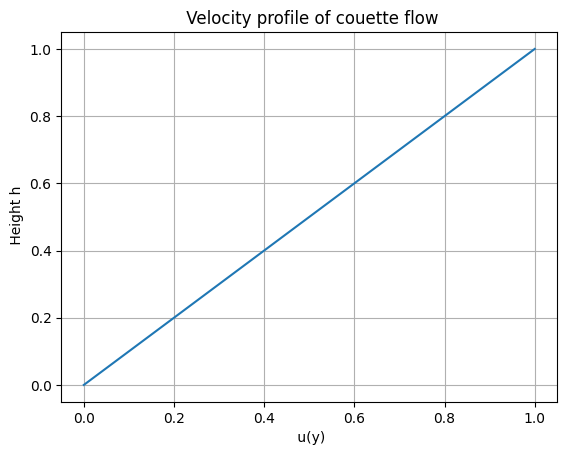

In [5]:
# from u_y substitute U0 and h and get u_new which will be just function of y
# now lambdify it to use it with numpy
# from u_new subsitute value of y and plot graph between u_new and y

U0_val=1
h_val=1

u = u_y.subs({ U0 : U0_val ,h : h_val})
u_new = sp.lambdify(y, u , "numpy")

y_vals = np.linspace(0, h_val, 100)
x_vals = u_new(y_vals)

plt.plot(x_vals, y_vals)
plt.xlabel(' u(y)')
plt.ylabel(' Height h')
plt.title(' Velocity profile of couette flow')
plt.grid(True)
plt.show